In [25]:
from sdv.metadata import SingleTableMetadata
import pandas as pd
import logging
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import seaborn as sns
import warnings
from IPython.display import HTML
from sdv.single_table import GaussianCopulaSynthesizer
from pathlib import Path
from sdv.metadata import Metadata


warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

In [2]:
seed_file = "final_agile_seed.csv"
unique_category_value_file='categories_unique_values.cvs'
data_folder = Path("../data")
config_folder = Path("../config")

In [3]:
# Load your data

# 1. Load your DataFrame (real data)
file_path = f"{config_folder}/{seed_file}"  # should use data_file for model training
file_name_no_ext = Path(file_path).stem                # 'ISBSG2016R1.1 - FormattedForCSV'
print(file_name_no_ext)


df = pd.read_csv(file_path)

# 2. Generate metadata from your dataframe
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)

metadata.save_to_json(f"{config_folder}/ISBSG2016_metadata.json", mode='overwrite')


sample_clean_a_agile_only_cleaned_no_add


In [7]:

# 0. Define your multi-value columns (with semicolons)
multi_value_cols = [
    'external_eef_organisation_type',
    'project_prf_application_type',
    'process_pmf_development_methodologies',
    'tech_tf_client_roles'
]

# Get all categorical columns (object type)
category_dict = df.select_dtypes(include='object').columns.tolist()

# 1. Exclude multi-value columns from categorical treatment
categorical_cols = [col for col in category_dict if col not in multi_value_cols]

print("Categorical columns for SDV:", categorical_cols)
print("Excluded multi-value columns:", multi_value_cols)

# 2. Clean & convert single-value categorical columns to pandas Categorical
for col in categorical_cols:
    if col in df.columns:
        cats = df[col].unique()
        # Clean: Remove nan, None, blanks, extra whitespace
        clean_cats = [str(x).strip() for x in cats if x and str(x).strip().lower() not in ['nan', 'none', '']]
        # Remove values in df that are not in categories (optional: uncomment to enforce)
        # df[col] = df[col].where(df[col].isin(clean_cats), np.nan)
        df[col] = pd.Categorical(df[col], categories=clean_cats)
        print(f"{col}: {clean_cats}")

# 3. Detect metadata from the cleaned DataFrame
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=df)

# 4. Optionally enforce sdtype for each cleaned categorical
for col in categorical_cols:
    if col in df.columns:
        metadata.update_column(column_name=col, sdtype='categorical')

# 5. Save updated metadata
metadata_path = os.path.join(config_folder, "ISBSG2016_metadata_ALLCATEGORIES.json")
metadata.save_to_json(metadata_path, mode='overwrite')
print(f"✓ Metadata updated and saved as {metadata_path}")

# 6. Initialize the synthesizer and generate synthetic data
from sdv.single_table import GaussianCopulaSynthesizer

print("\n=== INITIALIZING SYNTHESIZER ===")
try:
    synthesizer = GaussianCopulaSynthesizer(metadata)
    print("✓ Synthesizer initialized successfully")
    
    print("Fitting synthesizer to data...")
    synthesizer.fit(df)
    print("✓ Synthesizer fitted successfully")
    
    print("Generating synthetic data...")
    synthetic_data = synthesizer.sample(10000)
    print(f"✓ Generated {len(synthetic_data)} synthetic samples")
    
    # Save to CSV
    output_path = os.path.join(data_folder, "synthetic_ISBSG2016R1_1_agile_cleaned.csv")
    synthetic_data.to_csv(output_path, index=False)
    print(f"✓ Synthetic data saved to {output_path}")
    
except Exception as e:
    print(f"✗ Error in synthesis process: {e}")
    import traceback
    traceback.print_exc()


Categorical columns for SDV: []
Excluded multi-value columns: ['external_eef_organisation_type', 'project_prf_application_type', 'process_pmf_development_methodologies', 'tech_tf_client_roles']
✓ Metadata updated and saved as ..\config\ISBSG2016_metadata_ALLCATEGORIES.json

=== INITIALIZING SYNTHESIZER ===
✓ Synthesizer initialized successfully
Fitting synthesizer to data...


C:\Users\jdche\.conda\envs\pycaret311\Lib\site-packages\sdv\single_table\base.py:145: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)


✓ Synthesizer fitted successfully
Generating synthetic data...
✓ Generated 10000 synthetic samples
✓ Synthetic data saved to ..\data\synthetic_ISBSG2016R1_1_agile_cleaned.csv


In [16]:


# Configure matplotlib and seaborn for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Set up basic logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

# Suppress certain warnings that might clutter the notebook
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Display function for better notebook output formatting
def display_header(text):
    display(HTML(f"<h3>{text}</h3>"))
    
def display_subheader(text):
    display(HTML(f"<h4>{text}</h4>"))

In [18]:
# Generate synthetic data

# Step 1: Load your data
input_file = "../data/synthetic_ISBSG2016R1_1_agile_cleaned.csv"
df = pd.read_csv(input_file)



# Exploratory Data Analysis

## Data Overview

Dataset shape: (10000, 52)
First 5 rows:


,isbsg_project_id,external_eef_data_quality_rating,project_prf_year_of_project,external_eef_industry_sector,external_eef_organisation_type,project_prf_application_group,project_prf_application_type,project_prf_development_type,tech_tf_development_platform,tech_tf_language_type,...,people_prf_it_experience_great_than_3_yr,people_prf_it_experience_less_than_3_yr,people_prf_it_experience_3_to_9_yr,people_prf_it_experience_great_than_9_yr,people_prf_project_manage_experience,people_prf_project_manage_changes,people_prf_personnel_changes,project_prf_total_project_cost,project_prf_cost_currency,project_prf_currency_multiple
0,26608,D,2009,NaN,community services,Business Application,mathematical modelling (finance or eng.); soft...,Re-development,PC,3GL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247831.0,"Canada, dollar",NaN
1,23265,B,2012,Service Industry,government,Business Application,surveillance and security,Enhancement,PC,3GL,...,NaN,17.0,NaN,NaN,27.0,NaN,0.0,38012.0,"Canada, dollar","Yes 10,000"
2,21719,A,2011,Banking,banking; communications; education institution...,Infrastructure Software,surveillance and security,New Development,PC,3GL,...,NaN,5.0,NaN,1.0,NaN,0.0,NaN,NaN,"United States, dollar",NaN
3,13026,B,2014,Banking,banking; communications; education institution...,Business Application,surveillance and security,Enhancement,Proprietary,3GL,...,NaN,NaN,13.0,NaN,NaN,NaN,0.0,NaN,"European, euro","Yes 10,000"
4,14345,B,2014,Government,banking; communications; education institution...,Business Application,surveillance and security,Enhancement,PC,3GL,...,NaN,0.0,8.0,NaN,NaN,NaN,NaN,NaN,"European, euro","Yes 10,000"


Last 5 rows:


,isbsg_project_id,external_eef_data_quality_rating,project_prf_year_of_project,external_eef_industry_sector,external_eef_organisation_type,project_prf_application_group,project_prf_application_type,project_prf_development_type,tech_tf_development_platform,tech_tf_language_type,...,people_prf_it_experience_great_than_3_yr,people_prf_it_experience_less_than_3_yr,people_prf_it_experience_3_to_9_yr,people_prf_it_experience_great_than_9_yr,people_prf_project_manage_experience,people_prf_project_manage_changes,people_prf_personnel_changes,project_prf_total_project_cost,project_prf_cost_currency,project_prf_currency_multiple
9995,27333,A,2011,Service Industry,"financial, property & business services",Business Application,idm,New Development,PC,3GL,...,NaN,NaN,4.0,2.0,NaN,2.0,1.0,293731.0,"European, euro",NaN
9996,31166,B,2010,Banking,government,Business Application,online analysis and reporting,Enhancement,PC,3GL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"European, euro",NaN
9997,30029,B,2013,Banking,banking; communications; education institution...,Business Application,surveillance and security,Enhancement,PC,3GL,...,NaN,0.0,4.0,4.0,NaN,0.0,NaN,130804.0,"European, euro",NaN
9998,19161,B,2010,Service Industry,medical and health care,Business Application,complex process control; workflow support & ma...,Re-development,NaN,3GL,...,NaN,2.0,6.0,4.0,15.0,NaN,NaN,85025.0,"European, euro",NaN
9999,25559,B,2014,Banking,banking; communications; education institution...,Business Application,surveillance and security,Enhancement,PC,3GL,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"European, euro",NaN


## Duplicate Rows

Number of duplicate rows: 0


## Data Types and Memory Usage

,Data Type,Memory Usage (MB)
Index,NaN,0.000126
external_eef_data_quality_rating,object,0.553131
external_eef_industry_sector,object,0.644826
external_eef_organisation_type,object,1.106729
isbsg_project_id,int64,0.076294
people_prf_ba_team_experience_1_to_3_yr,float64,0.076294
people_prf_ba_team_experience_great_than_3_yr,float64,0.076294
people_prf_ba_team_experience_less_than_1_yr,float64,0.076294
people_prf_it_experience_1_to_3_yr,float64,0.076294
people_prf_it_experience_3_to_9_yr,float64,0.076294


## Unique Values Per Column

isbsg_project_id: 77 unique values
external_eef_data_quality_rating: 4 unique values
project_prf_year_of_project: 11 unique values
external_eef_industry_sector: 10 unique values
external_eef_organisation_type: 23 unique values
project_prf_application_group: 4 unique values
project_prf_application_type: 31 unique values
project_prf_development_type: 3 unique values
tech_tf_development_platform: 4 unique values
tech_tf_language_type: 3 unique values
tech_tf_primary_programming_language: 8 unique values
project_prf_functional_size: 1341 unique values
project_prf_relative_size: 6 unique values
project_prf_normalised_work_effort_level_1: 5255 unique values
project_prf_normalised_work_effort: 4622 unique values
project_prf_normalised_level_1_pdr_ufp: 845 unique values
project_prf_normalised_pdr_ufp: 847 unique values
project_prf_defect_density: 714 unique values
project_prf_speed_of_delivery: 2936 unique values
project_prf_manpower_delivery_rate: 1886 unique values
project_prf_project_elapse

## Type Conversion Suggestions

Consider converting to 'category' dtype for memory/performance:
['external_eef_data_quality_rating', 'external_eef_industry_sector', 'external_eef_organisation_type', 'project_prf_application_group', 'project_prf_application_type', 'project_prf_development_type', 'tech_tf_development_platform', 'tech_tf_language_type', 'tech_tf_primary_programming_language', 'project_prf_relative_size', 'project_prf_team_size_group', 'project_prf_case_tool_used', 'process_pmf_development_methodologies', 'process_pmf_prototyping_used', 'tech_tf_architecture', 'tech_tf_client_server', 'tech_tf_client_roles', 'tech_tf_server_roles', 'tech_tf_web_development', 'tech_tf_dbms_used', 'project_prf_cost_currency', 'project_prf_currency_multiple']


## Summary Statistics

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
isbsg_project_id,10000.000000,nan,nan,nan,22710.310300,7097.927702,10279.000000,15558.000000,23552.000000,29310.000000,32725.000000
external_eef_data_quality_rating,10000,4,B,7266,nan,nan,nan,nan,nan,nan,nan
project_prf_year_of_project,10000.000000,nan,nan,nan,2011.364500,2.098113,2005.000000,2010.000000,2012.000000,2013.000000,2015.000000
external_eef_industry_sector,9866,10,Banking,3409,nan,nan,nan,nan,nan,nan,nan
external_eef_organisation_type,10000,23,banking; communications; education institution; government; medical and health care; transport & storage; wholesale & retail trade,3165,nan,nan,nan,nan,nan,nan,nan
project_prf_application_group,9991,4,Business Application,8896,nan,nan,nan,nan,nan,nan,nan
project_prf_application_type,10000,31,surveillance and security,3270,nan,nan,nan,nan,nan,nan,nan
project_prf_development_type,10000,3,Enhancement,5958,nan,nan,nan,nan,nan,nan,nan
tech_tf_development_platform,8997,4,PC,6255,nan,nan,nan,nan,nan,nan,nan
tech_tf_language_type,10000,3,3GL,9604,nan,nan,nan,nan,nan,nan,nan


## Missing Values

,Missing Values,Percentage (%)
tech_tf_client/server_description,10000,100.000000
tech_tf_type_of_server,10000,100.000000
people_prf_it_experience_great_than_3_yr,10000,100.000000
people_prf_it_experience_1_to_3_yr,10000,100.000000
people_prf_it_experience_less_than_1_yr,10000,100.000000
people_prf_project_user_involvement,10000,100.000000
people_prf_ba_team_experience_great_than_3_yr,7863,78.630000
project_prf_currency_multiple,7839,78.390000
people_prf_ba_team_experience_less_than_1_yr,7685,76.850000
people_prf_ba_team_experience_1_to_3_yr,7526,75.260000


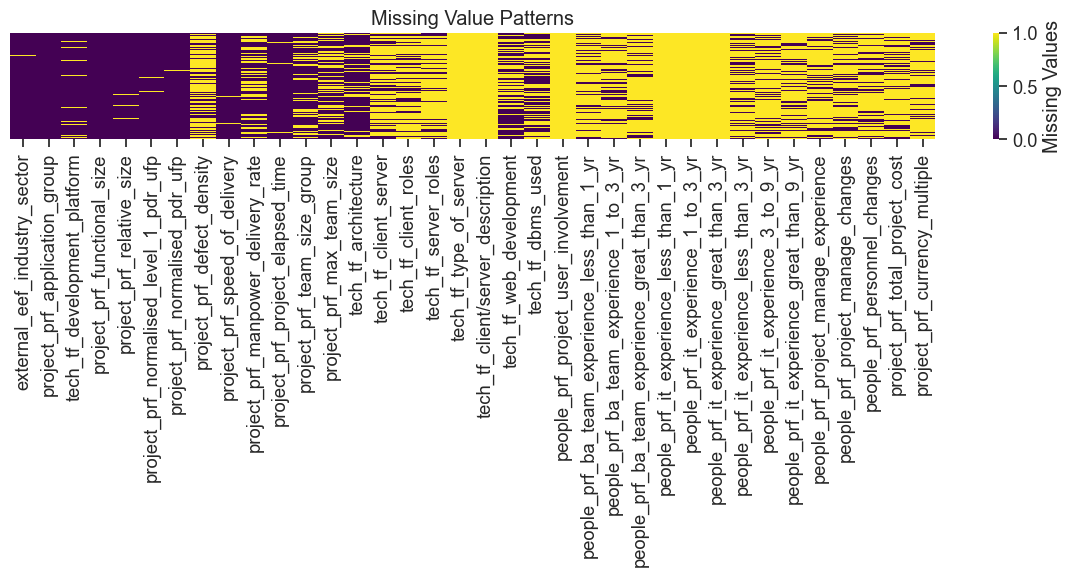

## Distribution of Numerical Features

C:\Users\jdche\AppData\Local\Temp\ipykernel_22008\1649711757.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


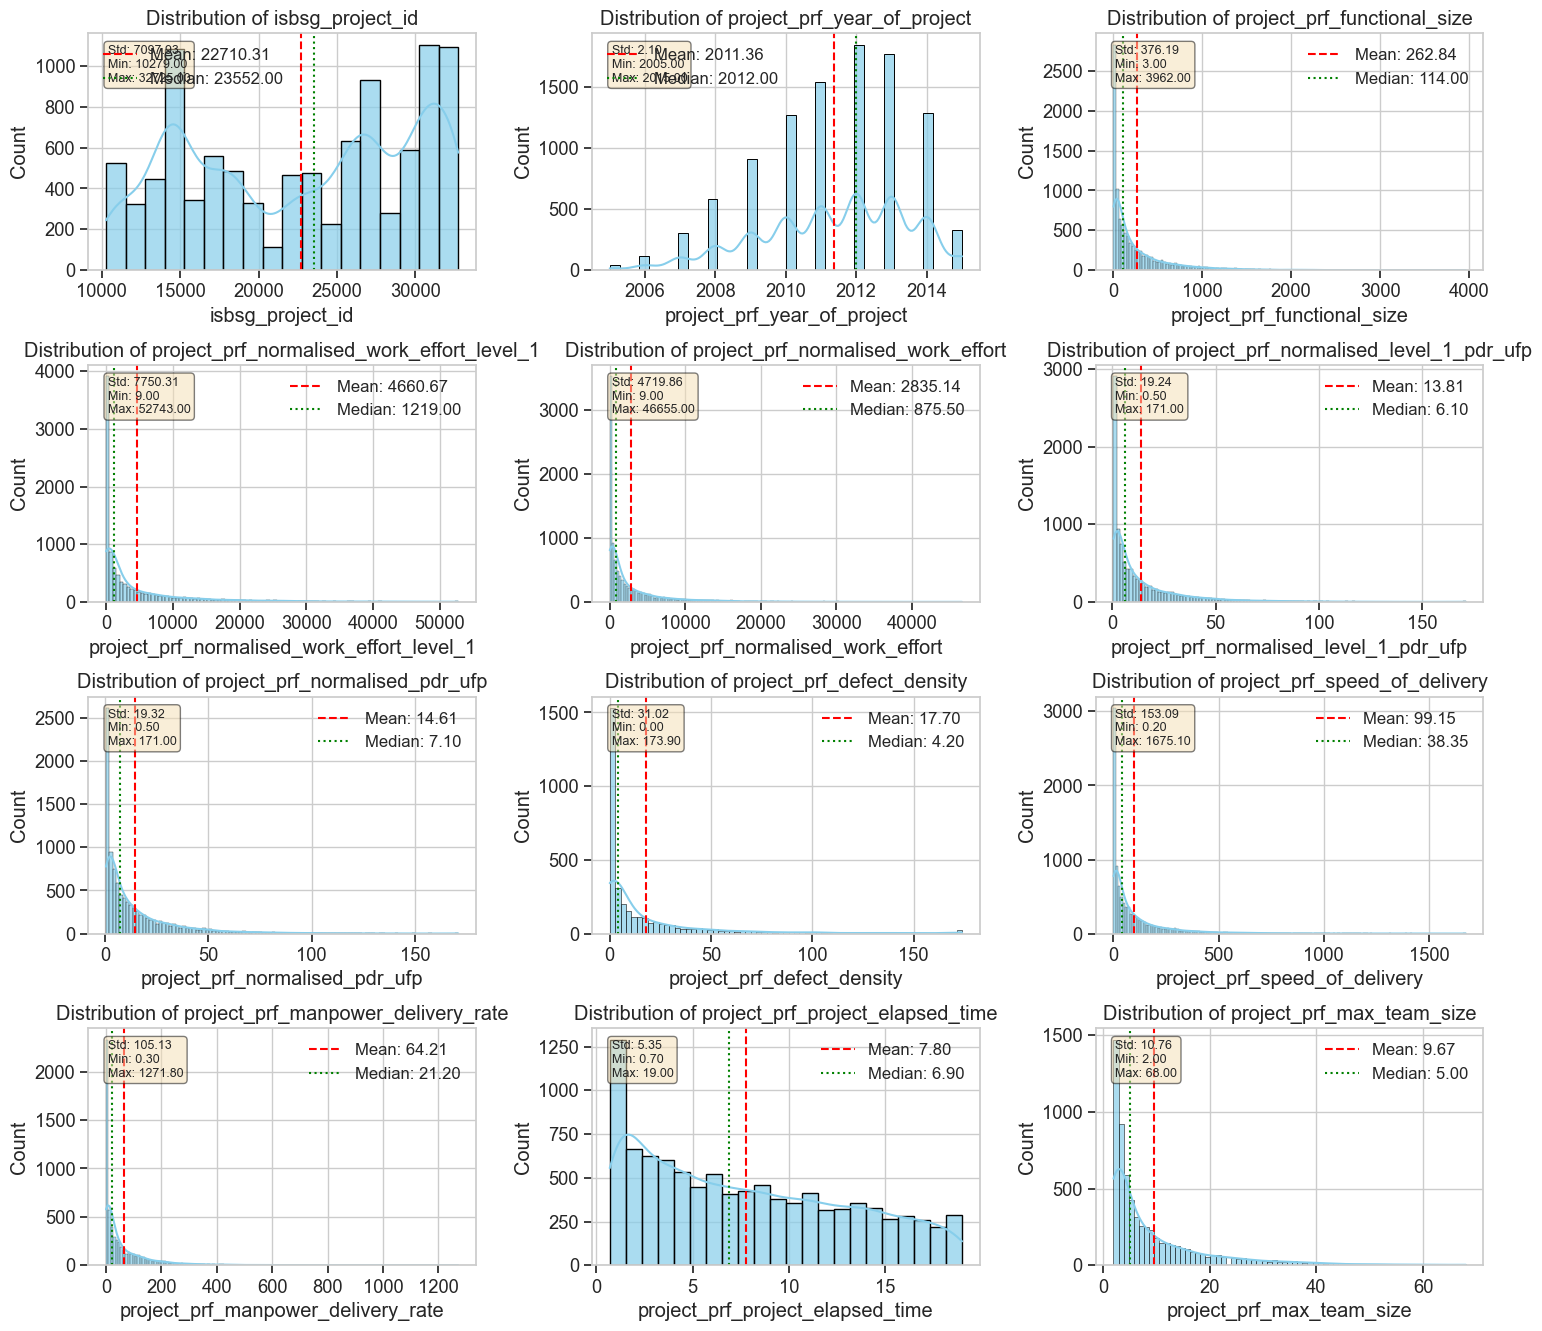

## Correlation Matrix

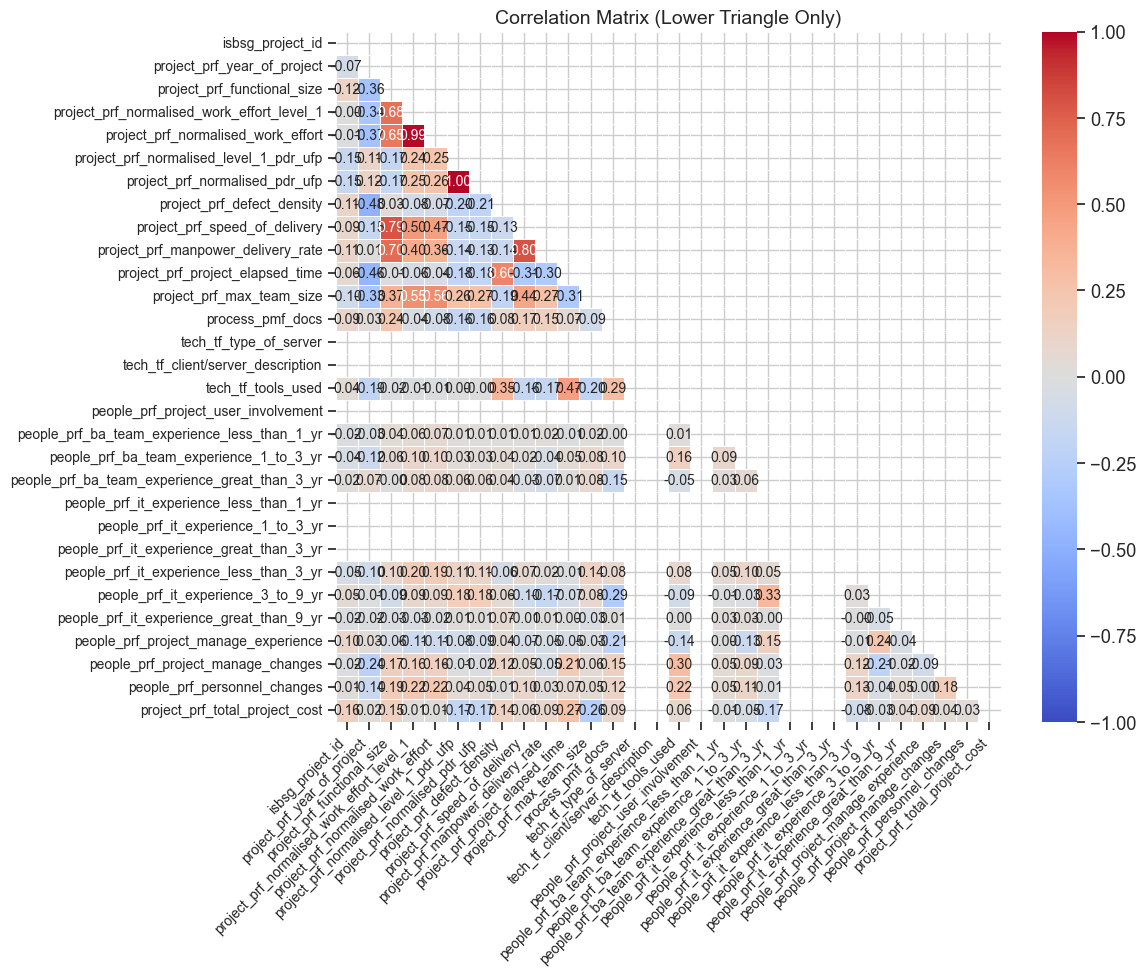

## Top Correlations

project_prf_normalised_work_effort_level_1 — project_prf_normalised_work_effort: 0.99
project_prf_normalised_work_effort — project_prf_normalised_work_effort_level_1: 0.99
project_prf_manpower_delivery_rate — project_prf_speed_of_delivery: 0.80
project_prf_speed_of_delivery — project_prf_manpower_delivery_rate: 0.80
project_prf_speed_of_delivery — project_prf_functional_size: 0.79
project_prf_functional_size — project_prf_speed_of_delivery: 0.79
project_prf_functional_size — project_prf_manpower_delivery_rate: 0.70
project_prf_manpower_delivery_rate — project_prf_functional_size: 0.70
project_prf_normalised_work_effort_level_1 — project_prf_functional_size: 0.68
project_prf_functional_size — project_prf_normalised_work_effort_level_1: 0.68
project_prf_normalised_work_effort — project_prf_functional_size: 0.65
project_prf_functional_size — project_prf_normalised_work_effort: 0.65
project_prf_project_elapsed_time — project_prf_defect_density: 0.60
project_prf_defect_density — project_prf

C:\Users\jdche\AppData\Local\Temp\ipykernel_22008\1649711757.py:164: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


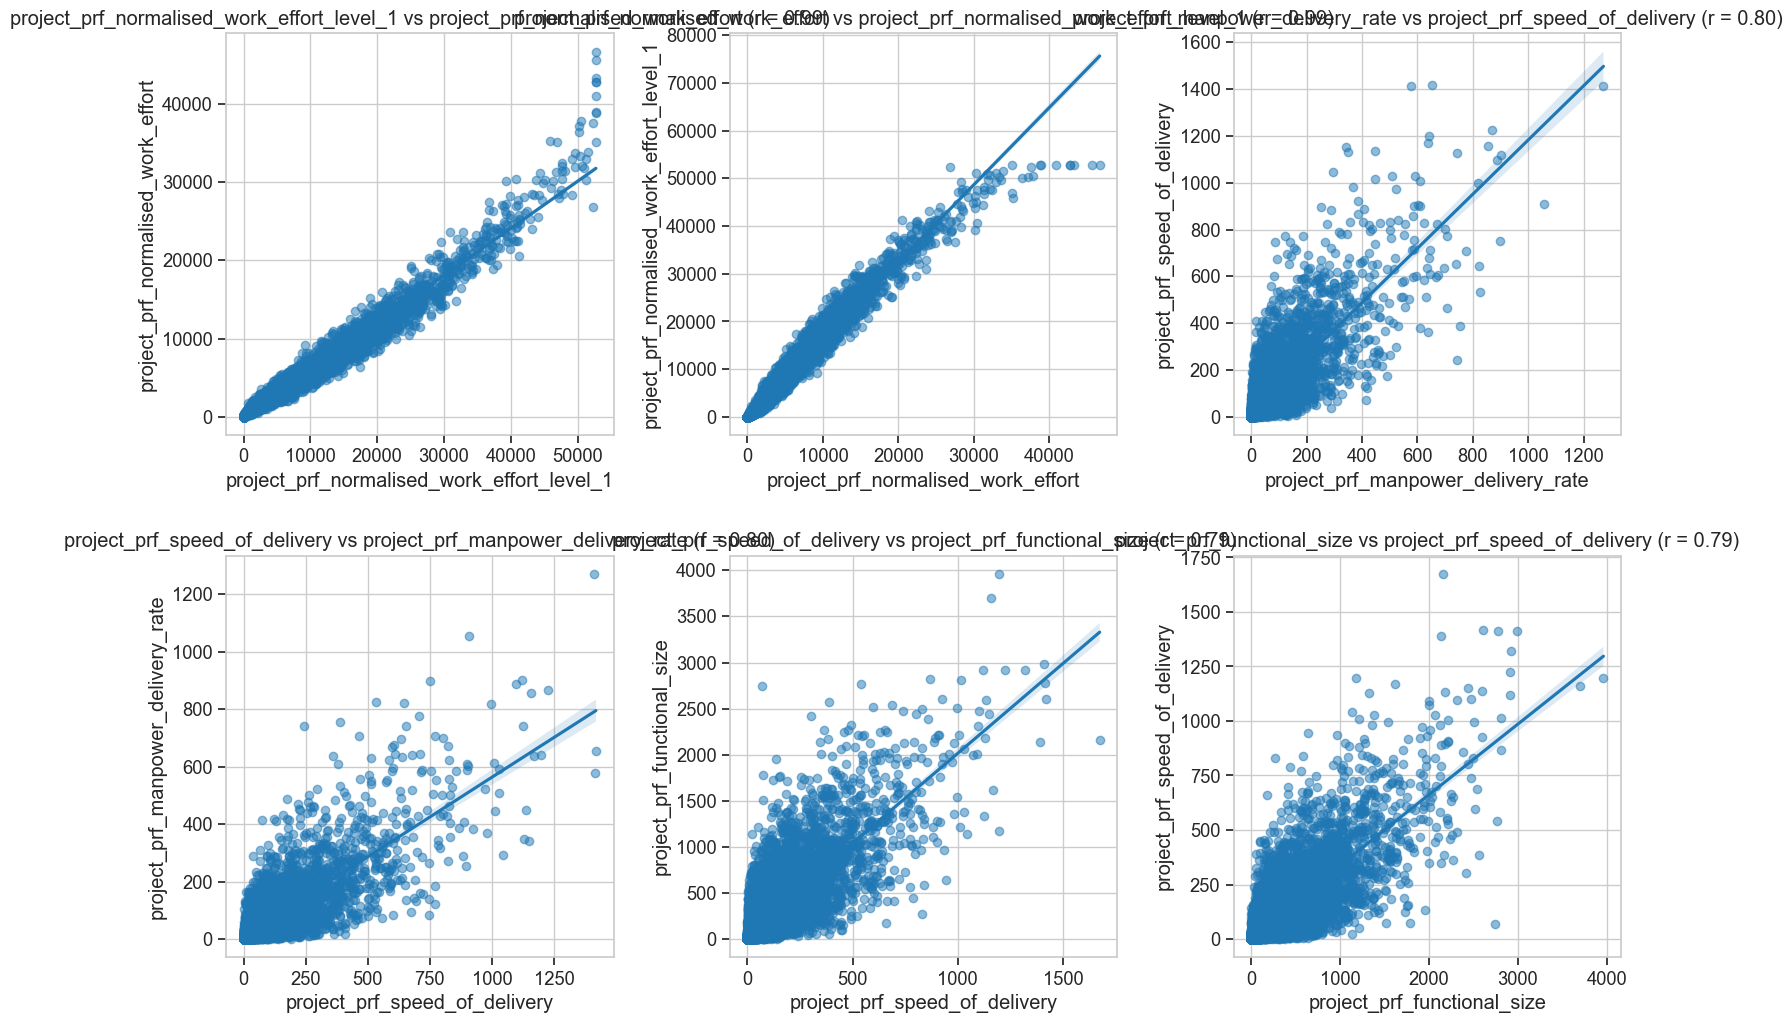

## Categorical Features

C:\Users\jdche\AppData\Local\Temp\ipykernel_22008\1649711757.py:193: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


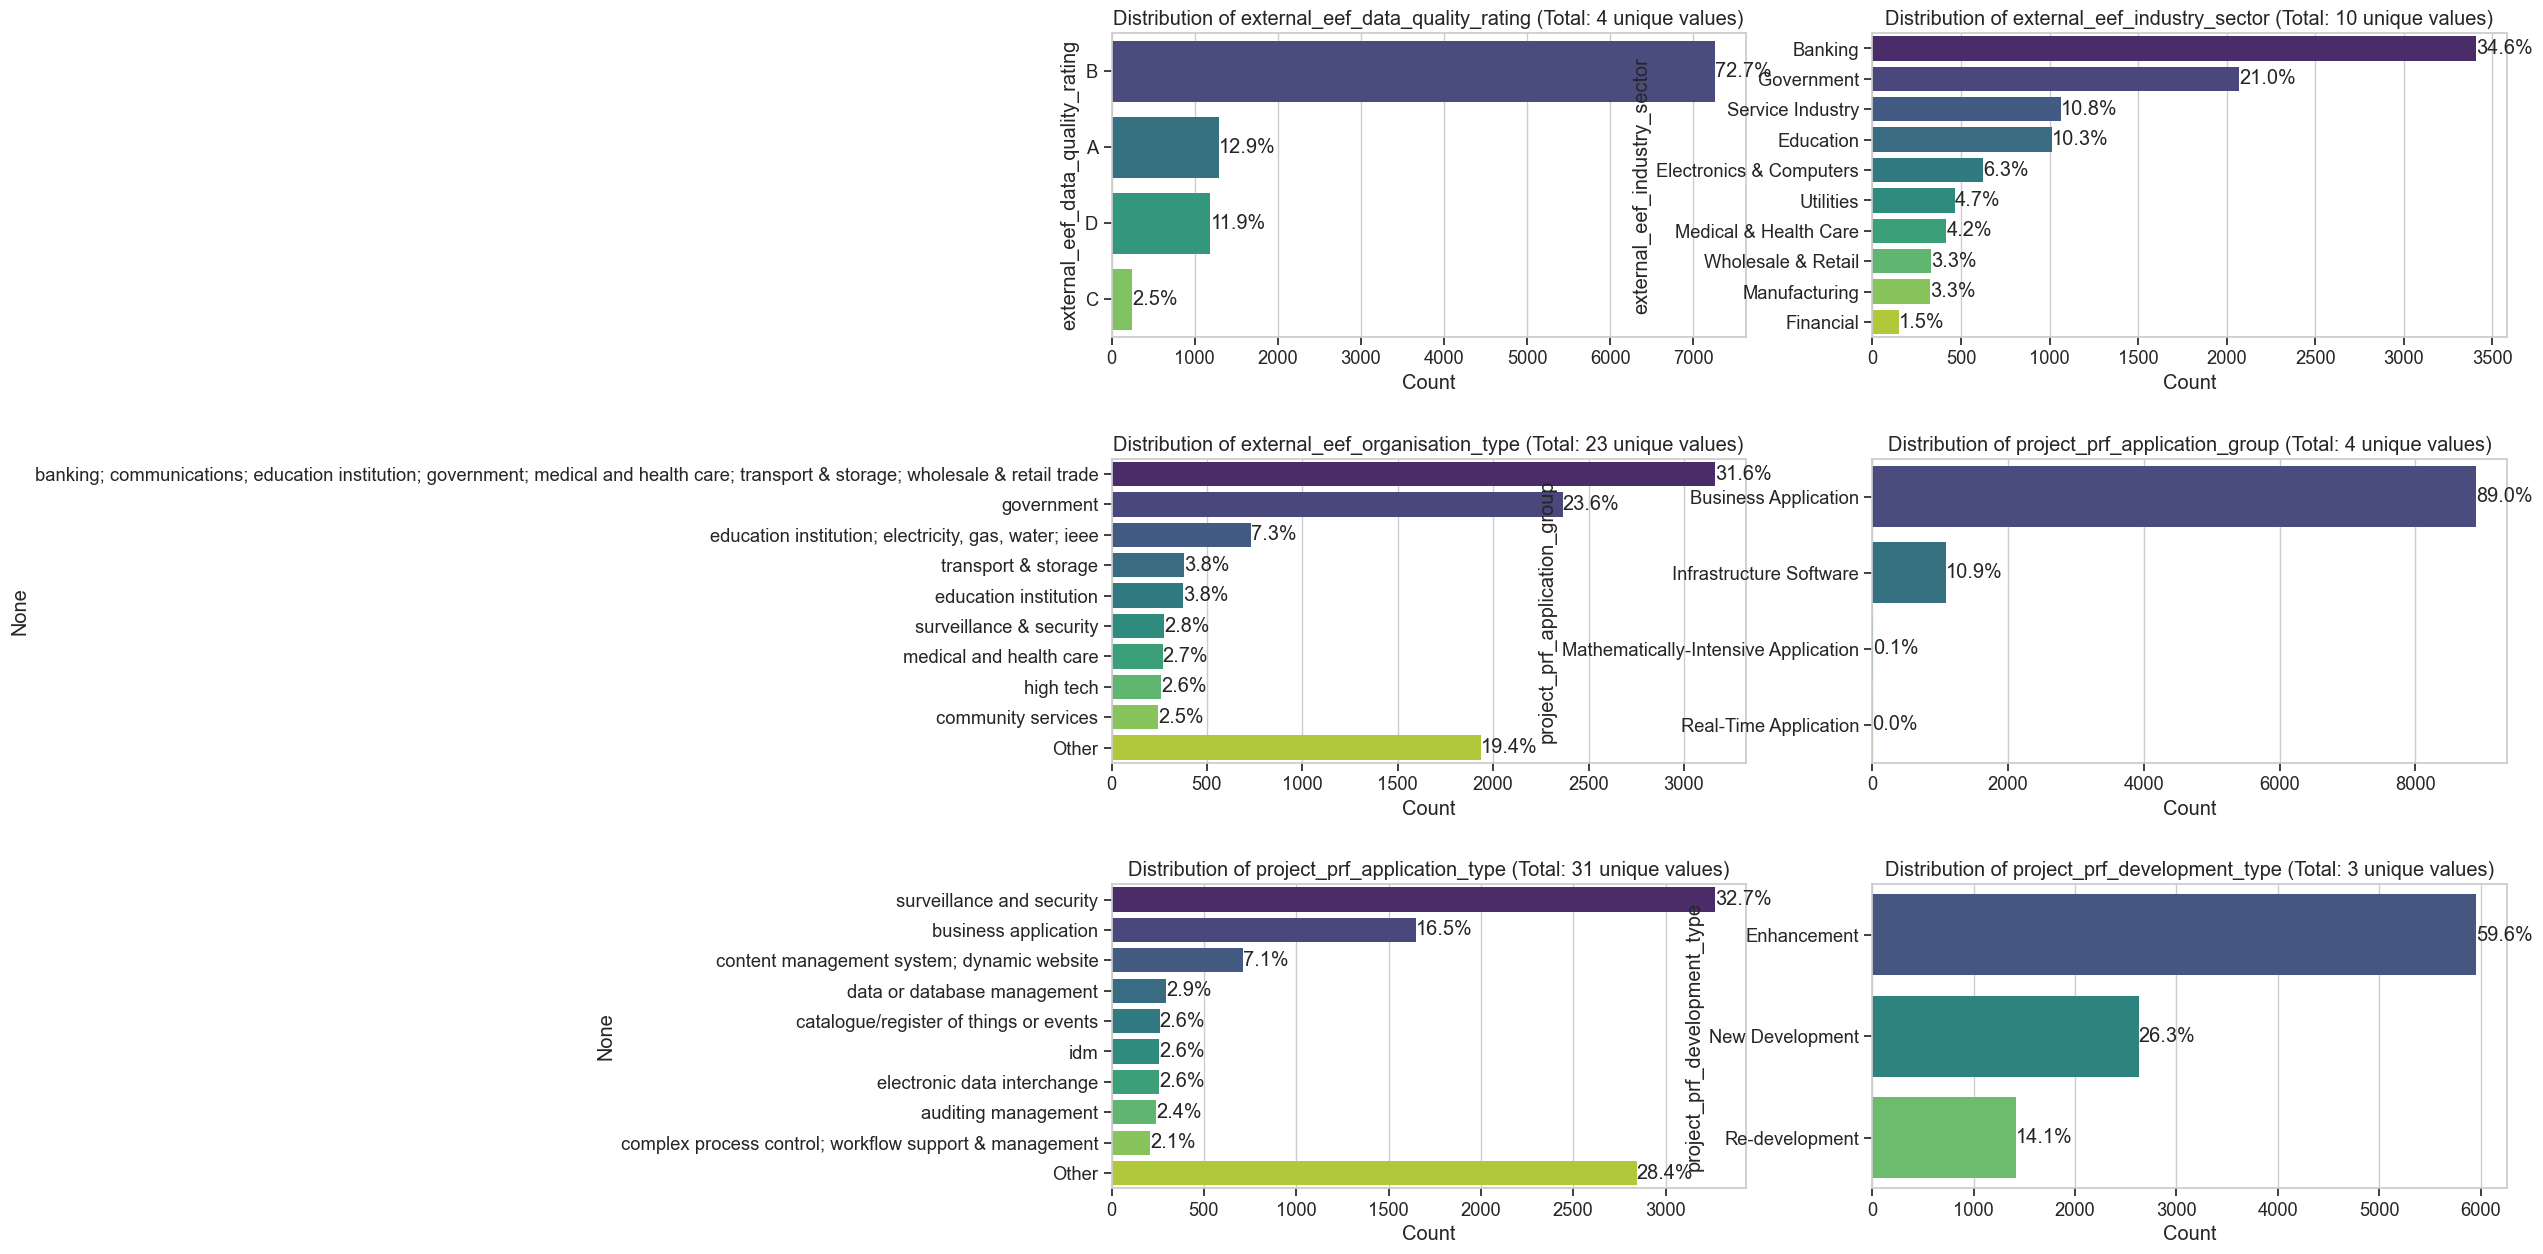

## Categorical-Numerical Relationships

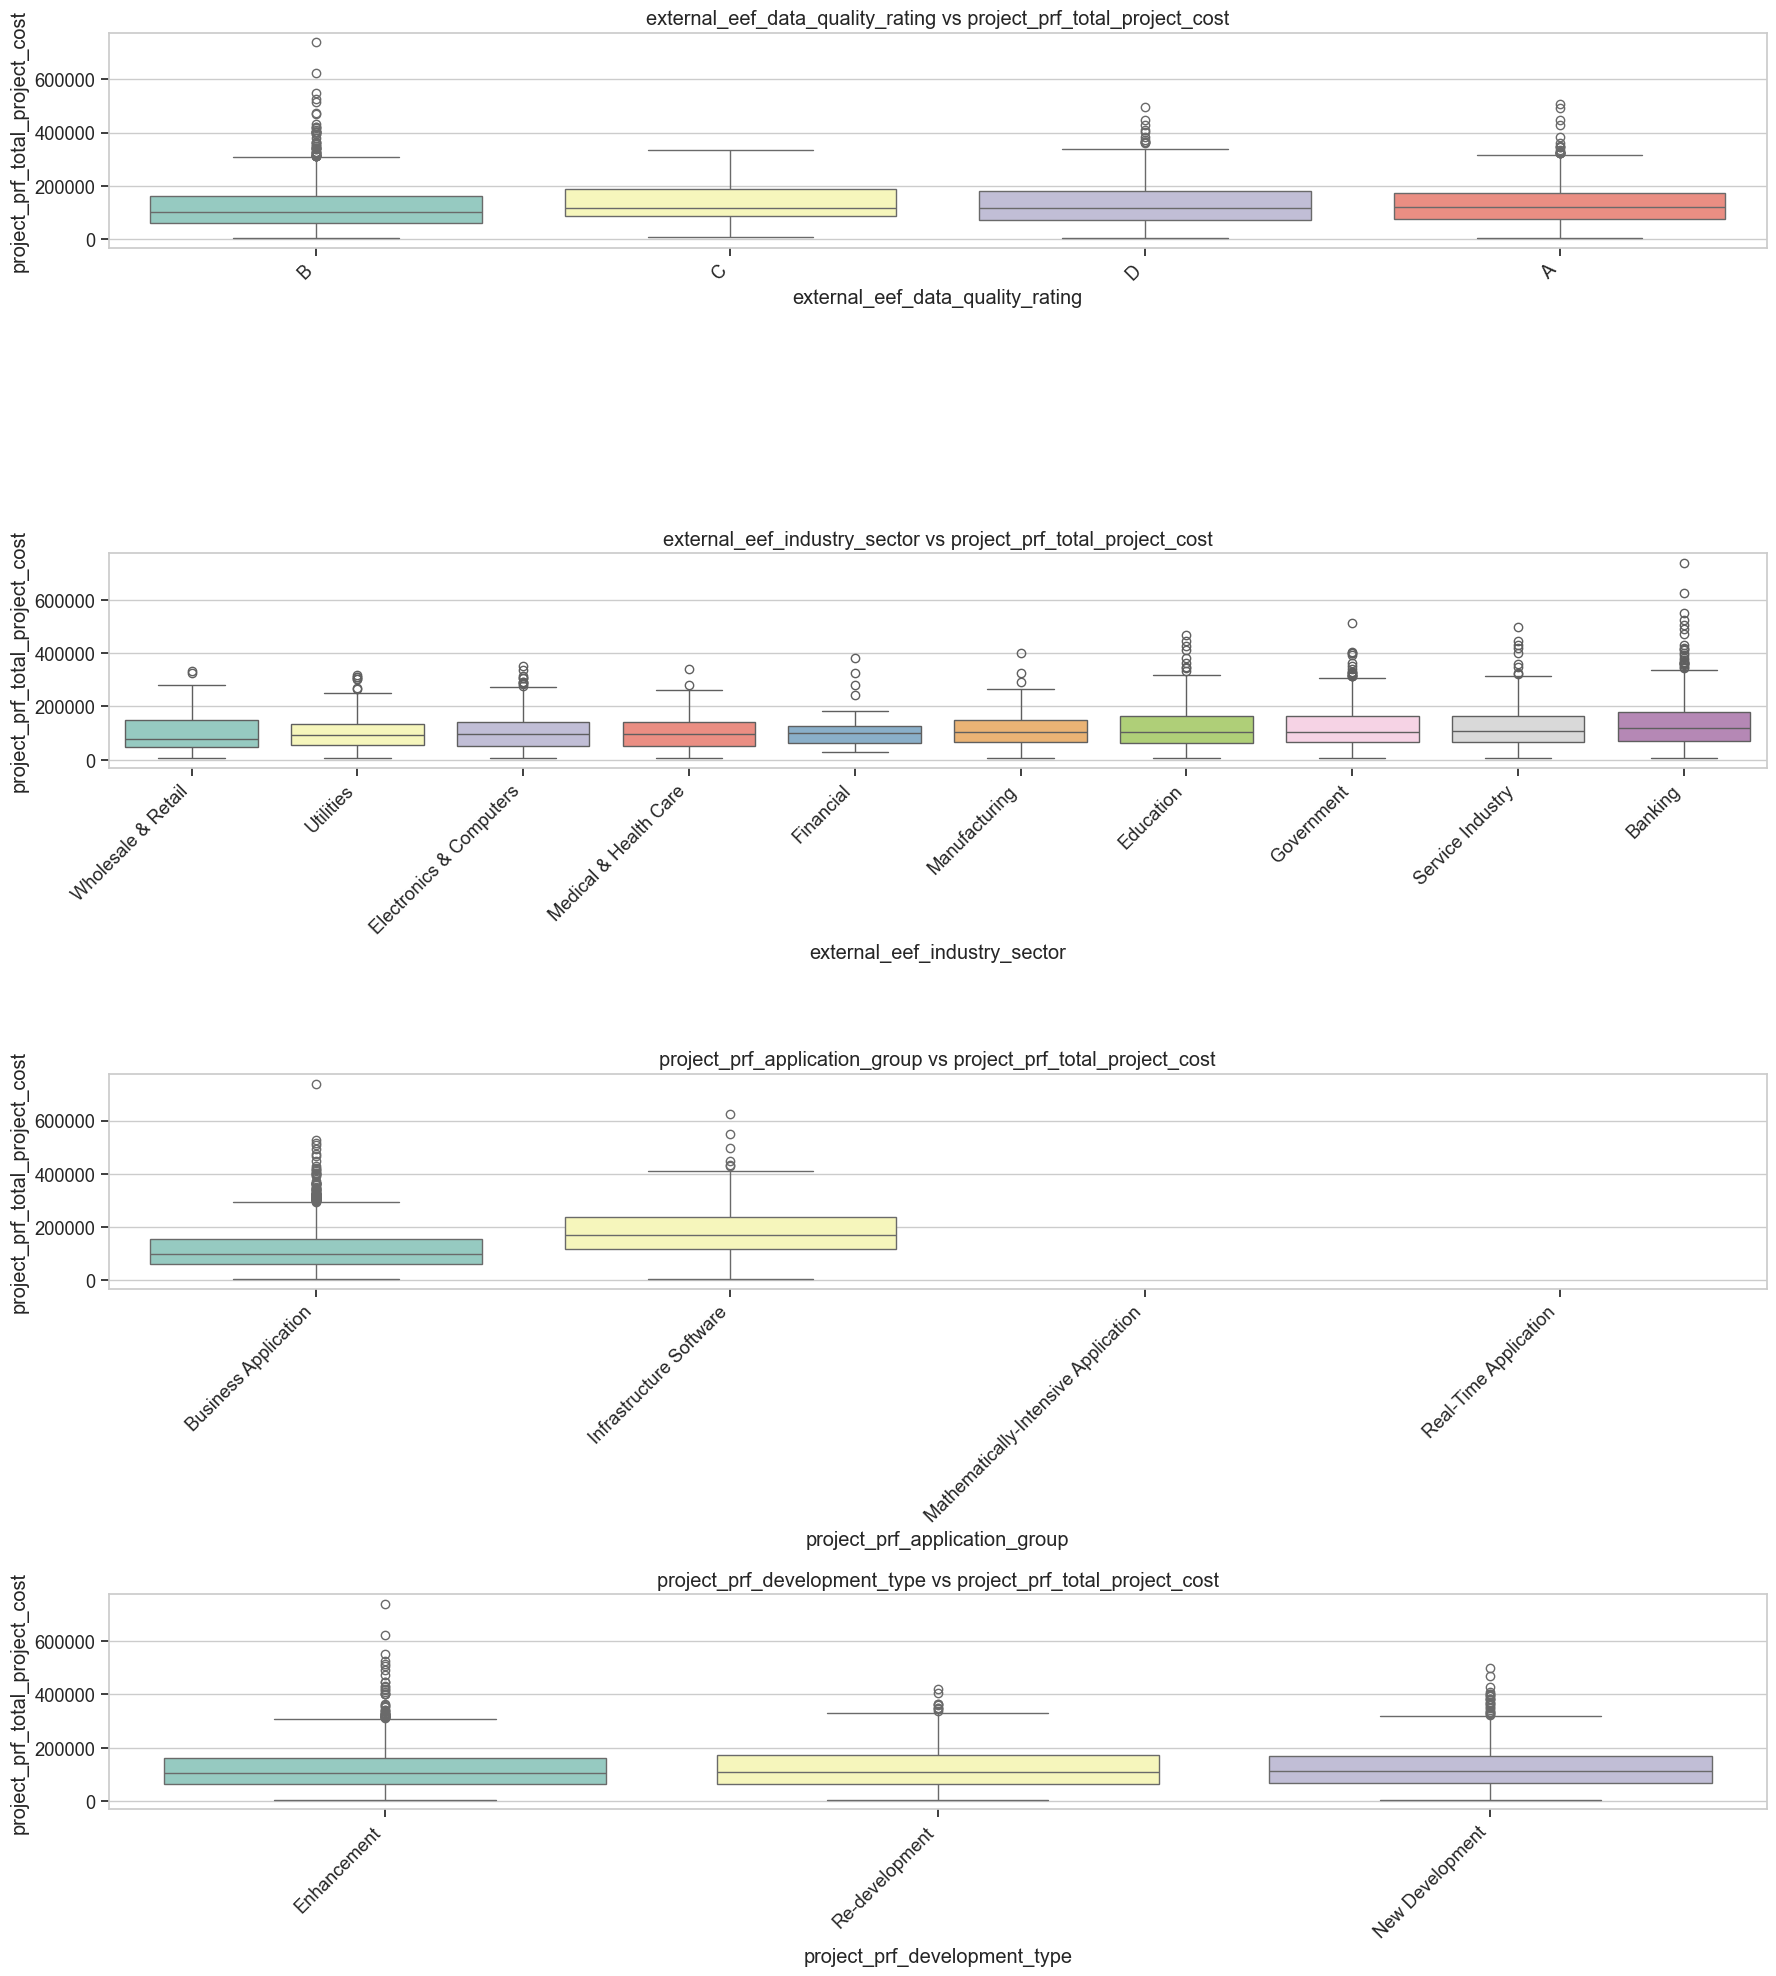

In [28]:
# Step 2: Explore the data

warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

def display_header(text):
    try:
        from IPython.display import display, Markdown
        display(Markdown(f"# {text}"))
    except ImportError:
        print(f"\n=== {text} ===\n")

def display_subheader(text):
    try:
        from IPython.display import display, Markdown
        display(Markdown(f"## {text}"))
    except ImportError:
        print(f"\n-- {text} --\n")

def explore_data(df: pd.DataFrame) -> None:
    """
    Perform exploratory data analysis on the input DataFrame with nicely aligned plots.
    Args:
        df: Input DataFrame
    """
    from IPython.display import display

    display_header("Exploratory Data Analysis")
    
    # Data Overview
    display_subheader("Data Overview")
    print(f"Dataset shape: {df.shape}")
    if df.shape[0] > 20:
        print("First 5 rows:")
        display(df.head())
        print("Last 5 rows:")
        display(df.tail())
    else:
        display(df)
    
    # Duplicate Row Checking
    display_subheader("Duplicate Rows")
    num_duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows: {num_duplicates}")

    # Data Types and Memory Usage
    display_subheader("Data Types and Memory Usage")
    dtype_info = pd.DataFrame({
        'Data Type': df.dtypes,
        'Memory Usage (MB)': df.memory_usage(deep=True) / 1024 / 1024
    })
    display(dtype_info)
    
    # Unique Values Per Column
    display_subheader("Unique Values Per Column")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")
    
    # Type Conversion Suggestions
    display_subheader("Type Conversion Suggestions")
    potential_cat = [
        col for col in df.select_dtypes(include=['object']).columns
        if df[col].nunique() < max(30, 0.05*df.shape[0])
    ]
    if potential_cat:
        print("Consider converting to 'category' dtype for memory/performance:")
        print(potential_cat)
    else:
        print("No obvious candidates for 'category' dtype conversion.")
    
    # Summary Statistics
    display_subheader("Summary Statistics")
    try:
        display(df.describe(include='all').T.style.background_gradient(cmap='Blues', axis=1))
    except Exception:
        display(df.describe(include='all').T)
    
    # Missing Values
    display_subheader("Missing Values")
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_info = pd.DataFrame({
        'Missing Values': missing,
        'Percentage (%)': missing_percent.round(2)
    })
    if missing.sum() > 0:
        display(missing_info[missing_info['Missing Values'] > 0]
                .sort_values('Missing Values', ascending=False)
                .style.background_gradient(cmap='Reds'))
        # Visualize missing values
        plt.figure(figsize=(12, 6))
        cols_with_missing = missing_info[missing_info['Missing Values'] > 0].index
        if len(cols_with_missing) > 0:
            sns.heatmap(df[cols_with_missing].isnull(), 
                        cmap='viridis', 
                        yticklabels=False, 
                        cbar_kws={'label': 'Missing Values'})
            plt.title('Missing Value Patterns')
            plt.tight_layout()
            plt.show()
    else:
        print("No missing values in the dataset.")
    
    # Numerical Distributions
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if len(numerical_cols) > 0:
        display_subheader("Distribution of Numerical Features")
        sample_cols = numerical_cols[:min(12, len(numerical_cols))]
        num_cols = len(sample_cols)
        num_rows = (num_cols + 2) // 3  # 3 plots per row, rounded up
        fig = plt.figure(figsize=(18, num_rows * 4))
        grid = plt.GridSpec(num_rows, 3, figure=fig, hspace=0.4, wspace=0.3)
        for i, col in enumerate(sample_cols):
            row, col_pos = divmod(i, 3)
            ax = fig.add_subplot(grid[row, col_pos])
            sns.histplot(df[col].dropna(), kde=True, ax=ax, color='skyblue', alpha=0.7)
            mean_val = df[col].mean()
            median_val = df[col].median()
            ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
            ax.axvline(median_val, color='green', linestyle=':', label=f'Median: {median_val:.2f}')
            stats_text = (f"Std: {df[col].std():.2f}\n"
                          f"Min: {df[col].min():.2f}\n"
                          f"Max: {df[col].max():.2f}")
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
            ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=9,
                    verticalalignment='top', bbox=props)
            ax.set_title(f'Distribution of {col}')
            ax.legend(fontsize='small')
        plt.tight_layout()
        plt.show()
        # Correlation matrix and top correlations
        if len(numerical_cols) > 1:
            display_subheader("Correlation Matrix")
            corr = df[numerical_cols].corr().round(2)
            mask = np.triu(np.ones_like(corr, dtype=bool))
            plt.figure(figsize=(12, 10))
            sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', 
                        fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, 
                        annot_kws={"size": 10})
            plt.title('Correlation Matrix (Lower Triangle Only)', fontsize=14)
            plt.xticks(rotation=45, ha='right', fontsize=10)
            plt.yticks(fontsize=10)
            plt.tight_layout()
            plt.show()
            # Top correlations
            if len(numerical_cols) > 5:
                corr_unstack = corr.unstack()
                corr_abs = corr_unstack.apply(abs)
                corr_abs = corr_abs[corr_abs < 1.0]
                highest_corrs = corr_abs.sort_values(ascending=False).head(15)
                display_subheader("Top Correlations")
                for (col1, col2), corr_val in highest_corrs.items():
                    actual_val = corr.loc[col1, col2]
                    print(f"{col1} — {col2}: {actual_val:.2f}")
                pairs_to_plot = [(idx[0], idx[1]) for idx in highest_corrs.index][:6]
                if pairs_to_plot:
                    fig = plt.figure(figsize=(18, 12))
                    grid = plt.GridSpec(2, 3, figure=fig, hspace=0.3, wspace=0.3)
                    for i, (col1, col2) in enumerate(pairs_to_plot):
                        row, col_pos = divmod(i, 3)
                        ax = fig.add_subplot(grid[row, col_pos])
                        sns.regplot(x=df[col1], y=df[col2], ax=ax, scatter_kws={'alpha':0.5})
                        r_value = df[col1].corr(df[col2])
                        ax.set_title(f'{col1} vs {col2} (r = {r_value:.2f})')
                    plt.tight_layout()
                    plt.show()
    # Categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if len(categorical_cols) > 0:
        display_subheader("Categorical Features")
        sample_cat_cols = categorical_cols[:min(6, len(categorical_cols))]
        num_cat_cols = len(sample_cat_cols)
        num_cat_rows = (num_cat_cols + 1) // 2
        fig = plt.figure(figsize=(18, num_cat_rows * 5))
        grid = plt.GridSpec(num_cat_rows, 2, figure=fig, hspace=0.4, wspace=0.2)
        for i, col in enumerate(sample_cat_cols):
            row, col_pos = divmod(i, 2)
            ax = fig.add_subplot(grid[row, col_pos])
            value_counts = df[col].value_counts().sort_values(ascending=False)
            top_n = min(10, len(value_counts))
            if len(value_counts) > top_n:
                top_values = value_counts.head(top_n-1)
                other_count = value_counts.iloc[top_n-1:].sum()
                plot_data = pd.concat([top_values, pd.Series({'Other': other_count})])
            else:
                plot_data = value_counts
            sns.barplot(x=plot_data.values, y=plot_data.index, ax=ax, palette='viridis')
            ax.set_title(f'Distribution of {col} (Total: {len(value_counts)} unique values)')
            ax.set_xlabel('Count')
            total = plot_data.sum()
            for j, v in enumerate(plot_data.values):
                percentage = v / total * 100
                ax.text(v + 0.1, j, f'{percentage:.1f}%', va='center')
        plt.tight_layout()
        plt.show()
        # Categorical-numerical boxplots
        if numerical_cols and len(categorical_cols) > 0:
            display_subheader("Categorical-Numerical Relationships")
            numerical_variances = df[numerical_cols].var()
            target_numerical = numerical_variances.idxmax()
            sample_cat_for_box = [col for col in categorical_cols 
                                  if df[col].nunique() <= 15][:4]
            if sample_cat_for_box:
                fig = plt.figure(figsize=(18, 5 * len(sample_cat_for_box)))
                for i, cat_col in enumerate(sample_cat_for_box):
                    ax = fig.add_subplot(len(sample_cat_for_box), 1, i+1)
                    order = df.groupby(cat_col)[target_numerical].median().sort_values().index
                    sns.boxplot(x=cat_col, y=target_numerical, data=df, ax=ax, 
                                order=order, palette='Set3')
                    ax.set_title(f'{cat_col} vs {target_numerical}')
                    ax.set_xlabel(cat_col)
                    ax.set_ylabel(target_numerical)
                    plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()

# Exploratory Data Analysis
explore_data(df)


